<a href="https://colab.research.google.com/github/khalishekahmad/teachingMLDL/blob/deep-learning/Deep_Learning_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Pengerjaan Deep Learning menggunakan PyTorch and TensorFlow (Week 1, Income)

# Persiapan: Pemuatan dan Preprocessing Data

## 1. Menginstal atau Memastikan Instalasi PyTorch, Tensorflow dan Modul Pendukung Seperti NumPy dan Pandas

In [183]:
%pip install pandas numpy matplotlib scikit-learn torch tensorflow

Note: you may need to restart the kernel to use updated packages.


## 2. Mengimpor Library yang Dibutuhkan

In [184]:
import pandas as pd # untuk membaca data dari file csv
import numpy as np # untuk operasi matematika
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import LabelEncoder, StandardScaler # untuk mengubah label kelas menjadi angka dan standarisasi data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix # untuk menghitung metrik evaluasi
import matplotlib.pyplot as plt # untuk membuat plot

## 3. Memuat Dataset ke Dalam Program

In [185]:
data = pd.read_csv('./income.csv').dropna() # membaca data dari file csv
data.sample(20) # menampilkan 10 baris data secara acak

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
39636,23,Private,196508,Some-college,10,Never-married,Adm-clerical,Own-child,Black,Female,0,0,24,United-States,<=50K.
10707,34,Self-emp-not-inc,426431,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
34257,55,Private,200327,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,18,United-States,<=50K.
23434,32,Private,251701,Assoc-acdm,12,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
42002,43,Private,290660,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,<=50K.
18720,60,?,41517,11th,7,Married-spouse-absent,?,Unmarried,Black,Female,0,0,20,United-States,<=50K
41794,66,Self-emp-not-inc,99927,HS-grad,9,Widowed,Tech-support,Not-in-family,White,Female,0,0,45,United-States,<=50K.
36731,44,Private,96170,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,20,United-States,<=50K.
19796,53,Private,189511,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
40576,47,Self-emp-not-inc,59987,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2002,42,United-States,<=50K.


In [186]:
data.describe() # menampilkan statistik data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,1.897271e+05,10.090821,1091.137649,87.853489,40.600050
std,13.558961,1.055695e+05,2.568320,7487.228336,404.010612,12.260345
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175840e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## 4. Mengonversi dan Menormalisasi Data

In [187]:
# Menghapus spasi tambahan dari kolom kategori jika ada
data = data.apply(lambda x: x.str.strip(' .') if x.dtype == "object" else x)

# Mengubah target menjadi biner (0 = <=50K, 1 = >50K)
data['income'] = LabelEncoder().fit_transform(data['income'])

# Memisahkan fitur numerik dan kategorikal
num_cols = data.drop(columns=['income']).select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Mengonversi variabel kategori menggunakan One-Hot Encoding
data = pd.get_dummies(data, columns=cat_cols, drop_first=True, dtype=int)

# Normalisasi fitur numerik
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['income']).values
y = data['income'].values

print(X.shape, y.shape)
print(X, "\n", y) # menampilkan data fitur dan label

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(47621, 100) (47621,)
[[ 0.02650056 -1.06292396  1.13272862 ...  1.          0.
   0.        ]
 [ 0.83778069 -1.00803062  1.13272862 ...  1.          0.
   0.        ]
 [-0.04725218  0.24551736 -0.42472622 ...  1.          0.
   0.        ]
 ...
 [-0.04725218  1.75484274  1.13272862 ...  1.          0.
   0.        ]
 [ 0.39526426 -1.00253655  1.13272862 ...  1.          0.
   0.        ]
 [-0.2685104  -0.07179363  1.13272862 ...  1.          0.
   0.        ]] 
 [0 0 0 ... 0 0 1]


## 5. Mempersiapkan Rumus Evaluasi (Akurasi, Presisi, Recall, F1Squared, AUC, ROC)

In [188]:
# Fungsinya untuk menghitung metrik evaluasi
# Metrik evaluasi yang digunakan adalah akurasi, presisi, recall, F1-score, AUC, dan ROC

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)

    return accuracy, precision, recall, f1, auc_score, fpr, tpr 

## 6. Membuat Fungsi Visualisasi

In [189]:
# Fungsinya untuk menampilkan matrix kebingungan (confusion matrix) untuk mengevaluasi model
# Matrix kebingungan ini menunjukkan persentase prediksi yang benar dan salah
def visualize_results(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.matshow(cm, cmap='Blues')
    plt.colorbar()

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j] / cm.sum() * 100:.2f}%', ha='center', va='bottom', color='lavender' if cm[i, j] > cm.max() / 2 else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Fungsinya untuk menampilkan plot hasil training model 
def visualize_training(history):
    if 'accuracy' in history:
        plt.plot(history['val_accuracy'] if 'val_accuracy' in history else history['accuracy'])
        plt.plot(history['accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Validation', 'Training'], loc='upper left')
    plt.plot(history['val_loss'] if 'val_loss' in history else history['loss'])
    plt.plot(history['loss'])
    plt.yscale('log')
    plt.title('Model loss')
    plt.ylabel('Loss (log scale)')
    plt.xlabel('Epoch')
    if 'accuracy' in history:
        plt.legend(['Validation accuracy', 'Training accuracy', 'Validation loss', 'Training loss'], loc='upper left')
    elif 'val_loss' in history:
        plt.legend(['Validation loss', 'Training loss'], loc='upper left')
    else:
        plt.legend(['Loss'], loc='upper left')
    plt.show()

# A. Deep Learning dengan PyTorch

## 1. Mengimpor Library yang Dibutuhkan

In [190]:
import torch
import torch.nn as nn # untuk membuat model neural network dengan pytorch
import torch.optim as optim # untuk mengoptimalkan model neural network

## 2. Mengonversi Dataset Menjadi Tipe Tensor PyTorch

In [191]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32) # Mengubah data latih menjadi tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.float32) # Mengubah label data latih menjadi tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32) # Mengubah data uji menjadi tensor
y_test_tensor = torch.tensor(y_test, dtype=torch.float32) # Mengubah label data uji menjadi tensor

## 3. Menyusun Model Neural Network Sederhana


In [192]:
# Mendefinisikan model sederhana dengan 1 hidden layer
class SimpleNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)
    
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 128 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

model = SimpleNN(input_dim, hidden_dim, output_dim) # Membuat model

## 4. Menyiapkan Optimizer dan Loss Function

In [193]:
criterion = nn.BCEWithLogitsLoss() # Menggunakan Binary Cross Entropy with Logits Loss 
optimizer = optim.Adam(model.parameters(), lr=0.005) # Menggunakan Adam optimizer

## 5. Melatih Model

In [194]:
# Melatih model
num_epochs = 100 # Jumlah iterasi pelatihan
history = pd.DataFrame() # Menyimpan statistik pelatihan

for epoch in range(num_epochs):
    optimizer.zero_grad() # Mengatur gradien menjadi 0 sebelum melakukan backpropagation
    y_pred = model(X_train_tensor) # Memprediksi data latih
    loss = criterion(y_pred, y_train_tensor.unsqueeze(1)) # Menghitung loss
    loss.backward() # Backpropagation
    optimizer.step() # Update bobot
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, loss={loss.item()}')

    # Menyimpan statistik pelatihan untuk menampilkan plot
    history = pd.concat([history, pd.DataFrame({'epoch': [epoch], 'loss': [loss.item()]})], ignore_index=True)

Epoch 0, loss=0.7277194261550903
Epoch 10, loss=0.429877907037735
Epoch 20, loss=0.3560483455657959
Epoch 30, loss=0.331839382648468
Epoch 40, loss=0.3233773708343506
Epoch 50, loss=0.31778839230537415
Epoch 60, loss=0.31287088990211487
Epoch 70, loss=0.30960968136787415
Epoch 80, loss=0.30675965547561646
Epoch 90, loss=0.30436789989471436


## 6. Mengevaluasi Model dengan Menghitung Akurasi, Presisi, Recall, F1Squared, ROC, dan AUC-ROC

In [195]:
model.eval() # Mengubah model menjadi mode evaluasi
y_pred = model(X_test_tensor) # Memprediksi data uji

# Menghitung metrik evaluasi
y_pred = (y_pred > 0).float()
accuracy, precision, recall, f1, auc_score, fpr, tpr = calculate_metrics(y_test_tensor, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'AUC: {auc_score}')
print(f'ROC: {fpr[1]}, {tpr[1]}')

Accuracy: 0.8530183727034121
Precision: 0.7538543328017012
Recall: 0.6021231422505308
F1-score: 0.6694995278564684
AUC: 0.7687742628965345
ROC: 0.06457461645746164, 0.6021231422505308


## 7. Memvisualisasikan Prediksi dari model yang telah dilatih

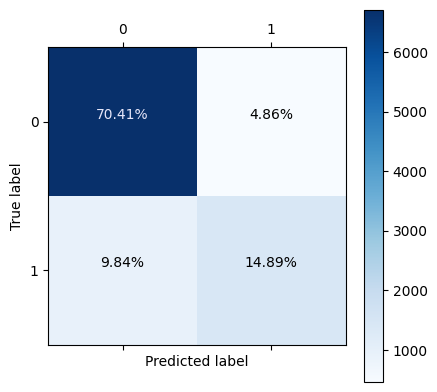

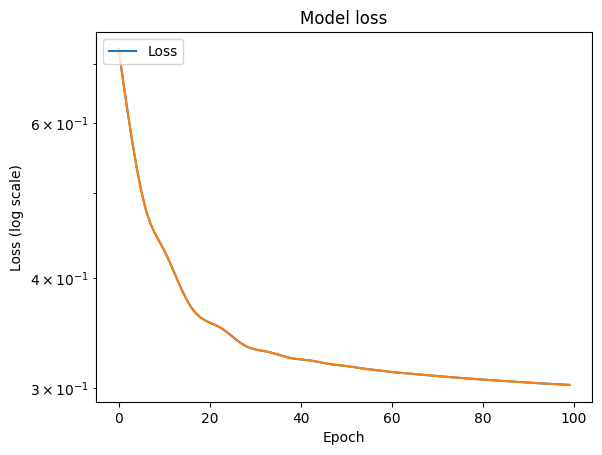

In [196]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred.detach().numpy())

# Menampilkan plot hasil training
visualize_training(history)

# Menyimpan model
torch.save(model.state_dict(), 'model_pytorch_income.pth')

# B. Deep Learning dengan TensorFlow

## 1. Import Library yang Dibutuhkan

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # untuk membuat model neural network
from tensorflow.keras.layers import Dense, Input # untuk menambah layer pada model
import matplotlib.pyplot as plt # untuk membuat plot

## 2. Penyusunan Model Neural Network


In [210]:
# Menentukan hyperparameter model
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 64 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

model_tf = Sequential([
    Dense(hidden_dim, activation='relu', input_shape=(100,)),
    Dense(hidden_dim, activation='relu'),
    Dense(output_dim, activation='sigmoid')
])

## 3. Kompilasi Model

In [211]:
# Kompilasi model
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 4. Pelatihan Model

In [212]:
# Melatih model
history = model_tf.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8359 - loss: 0.3581 - val_accuracy: 0.8524 - val_loss: 0.3168
Epoch 2/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8543 - loss: 0.3140 - val_accuracy: 0.8546 - val_loss: 0.3134
Epoch 3/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8594 - loss: 0.3046 - val_accuracy: 0.8536 - val_loss: 0.3149
Epoch 4/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8614 - loss: 0.3029 - val_accuracy: 0.8559 - val_loss: 0.3128
Epoch 5/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8652 - loss: 0.2928 - val_accuracy: 0.8523 - val_loss: 0.3158
Epoch 6/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8618 - loss: 0.2931 - val_accuracy: 0.8573 - val_loss: 0.3106
Epoch 7/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8642 - loss: 0.2872 - val_accuracy: 0.8561 - val_loss: 0.3098
Epoch 8/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8682 - loss: 0.2869 - 

## 5. Evaluasi model dengan menghitung Akurasi, Presisi, Recall, F1Squared, ROC, dan AUC-ROC

In [213]:
# Memprediksi data uji
y_pred = (model_tf.predict(X_test) > 0.5).astype(int).flatten()

# Menghitung metrik evaluasi
y_pred = (y_pred > 0.2).astype(int)
accuracy, precision, recall, f1, auc_score, fpr, tpr = calculate_metrics(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'AUC: {auc_score}')
print(f'ROC: {fpr[1]}, {tpr[1]}')

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8507086614173228
Precision: 0.7338345864661654
Recall: 0.621656050955414
F1-score: 0.6731034482758621
AUC: 0.7737987367747781
ROC: 0.07405857740585774, 0.621656050955414


## 6. Memvisualisasikan Prediksi dari model yang telah dilatih

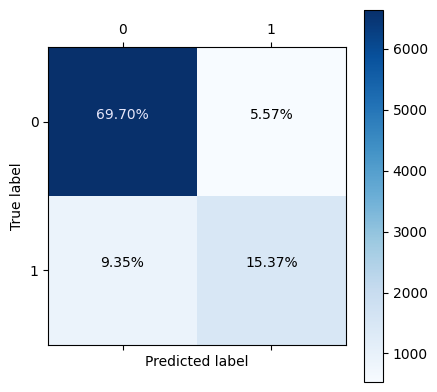

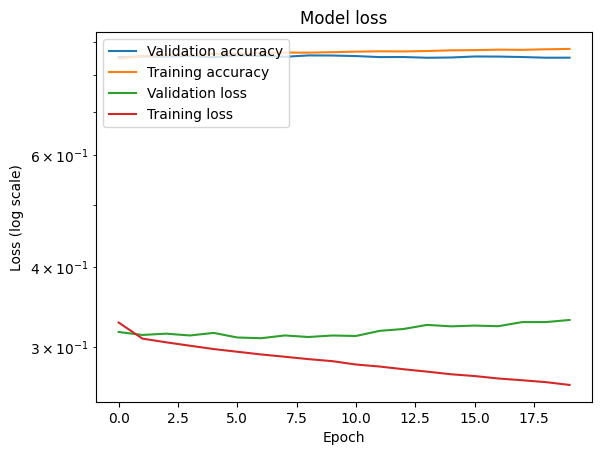

In [214]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred)

# Menampilkan plot hasil training
visualize_training(history.history)

# Menyimpan model
model_tf.save('model_tensorflow_income.keras')

## Penjelasan Lengkap Persamaan dalam Implementasi Deep Learning

Dalam implementasi deep learning, terdapat beberapa komponen utama yang melibatkan beberapa persamaan matematis. Persamaan-persamaan tersebut akan dibahas secara sistematis mulai dari forward pass, fungsi aktivasi, backward pass (backpropagation), fungsi loss, dan optimisasi.



Persamaan yang ada pada suatu implementasi deep learning meliputi:

# 1. Forward Pass (Propagasi Maju)
Forward pass adalah proses perhitungan dari input hingga output. Ini melibatkan bobot, bias, dan fungsi aktivasi.

## a. Perhitungan Linear di Setiap Lapisan
Setiap neuron dalam jaringan saraf menerima input, mengalikannya dengan bobot, menambahkan bias, lalu melewatkannya ke fungsi aktivasi.

$$ z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)} $$

Variabelnya:
- $ W^{(l)}  $ = matriks bobot pada lapisan ke-$l$
- $ a^{(l-1)} $ = output dari lapisan sebelumnya
- $ b^{(l)} $ = bias pada lapisan ke-$l$
- $ z^{(l)} $ = hasil linear sebelum masuk fungsi aktivasi  

Fungsi ini mirip dengan regresi linear! Tetapi dalam deep learning, hasilnya akan dilewatkan ke fungsi aktivasi.



# 2. Fungsi Aktivasi
Setelah $z^{(l)}$ dihitung, kita menerapkan fungsi aktivasi. Fungsi ini menentukan apakah suatu neuron aktif atau tidak. Pada mayoritas kasus, fungsi aktivasi yang digunakan adalah RelU (Rectified Linear Unit). Namun, untuk kasus klasifikasi, fungsi seperti Sigmoid atau Softmax digunakan untuk menghasilkan hasil klasifikasi yang baik.

## ReLU (Rectified Linear Unit)
$$ f(z) = \max(0, z) $$
Fungsi ini hanya melewatkan nilai positif, sementara nilai negatif diubah menjadi nol, membantu menghindari vanishing gradient.

## Sigmoid (digunakan untuk klasifikasi biner seperti pada dataset ini)
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
Fungsi ini mengubah nilai menjadi rentang (0,1) sehingga cocok untuk probabilitas.



# 3. Backpropagation (Propagasi Balik)
Backpropagation digunakan untuk menghitung gradien dan memperbarui bobot dengan cara menurunkan loss.
Menggunakan aturan rantai:
$$ \frac{\partial L}{\partial W^{(l)}} = \frac{\partial L}{\partial a^{(l)}} \cdot \frac{\partial a^{(l)}}{\partial z^{(l)}} \cdot \frac{\partial z^{(l)}}{\partial W^{(l)}} $$

**Variabelnya:**
- $ L $ = fungsi loss
- $ W^{(l)} $ = bobot pada lapisan ke-\(l\)
- $ a^{(l)} $ = output dari lapisan ke-\(l\)
- $ z^{(l)} $ = input sebelum aktivasi di lapisan ke-\(l\)



# 4. Fungsi Loss
Fungsi loss mengukur seberapa baik model melakukan prediksi. Pada kasus klasifikasi, terdapat dua fungsi loss yang sering digunakan, yaitu Binary Cross-Entropy (BCE) dan categorical cross-entropy (CCE)

## a. Binary Cross-Entropy (untuk klasifikasi biner)
$$
L = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$
Digunakan dalam klasifikasi biner, seperti dataset ini. Semakin besar perbedaan antara prediksi $ \hat{y}_i $ dan target $ y_i $, semakin besar loss-nya.

## b. Categorical Cross-Entropy (untuk multi-kelas)
$$
L = - \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})
$$
Digunakan untuk pemodelan multi-kelas. Jika model memberi probabilitas rendah pada kelas yang benar, loss akan lebih besar.



# 5. Optimisasi Bobot dengan Gradient Descent
Bobot diperbarui dengan Gradient Descent.

$$
W' = W - \alpha \frac{\partial L}{\partial W}
$$

Di sini, bobot diperbarui dengan mengurangi gradien loss terhadap bobot.

### Adam Optimizer
Adam adalah pengembangan dari gradient descent yang menggunakan momentum dan adaptive learning rate.

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \frac{\partial L}{\partial W}
$$

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) \left( \frac{\partial L}{\partial W} \right)^2
$$

$$
W' = W - \frac{\alpha}{\sqrt{v_t} + \epsilon} m_t
$$

Adam lebih stabil dan lebih cepat dibandingkan gradient descent biasa.



# Penjelasan Metrik Evaluasi:
## Akurasi

$$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}} $$

Menunjukkan seberapa sering model memprediksi dengan benar.


## Presisi

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Negatives} + \text{False Positives}} $$

Seberapa andal prediksi positif model.


## Recall (Sensitivity)

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

Seberapa baik model menangkap kelas positif.


## F1-Score

$$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

Rata-rata harmonik antara presisi dan recall.


## ROC (Receiver Operating Characteristic) Curve

ROC Curve memplot hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR):

$$ \text{True Positive Rate (TPR)} = \text{Recall} $$

$$ \text{False Positive Rate (FPR)} = \frac{\text{False Positives}}{ \text{False Positives} + \text{True Negatives}} $$


## AUC-ROC

$$ AUC = \int_{0}^{1} TPR(x) \, dx $$

AUC (Area Under Curve) adalah area di bawah kurva ROC (Receiver Operating Characteristic)

## Manakah yang paing baik di antara metrik-metrik evaluasi tersebut?

#### Metrik evaluasi yang digunakan memiliki karakteristik dan kelebihannya masing-masing. Metrik yang sederhana seperti Akurasi dan Presisi cenderung lebih mudah untuk diimplementasi dan dijelaskan, namun tidak cocok digunakan untuk dataset yang beragam dan tidak seimbang. Sedangkan metrik yang kompleks seperti ROC dan AUC mampu menganalisis prediksi model dengan dataset yang beragam, namun memerlukan komputasi yang lebih besar dan penjelasan yang lebih rumit